In [6]:
import os
import requests
import aiohttp
import asyncio
import nest_asyncio
import pandas as pd
import time
import scrapy
from scrapy_playwright.page import PageMethod
from bs4 import BeautifulSoup
import nest_asyncio
import glob
import numpy as np
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz, process
import re


In [7]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build

# Google Sheet ID
sheet_id = '1ipwIl7fciIlddvOUqGLpNlVQufw7Xd26Qa-YuJcx-xE'

SCOPES = ['https://www.googleapis.com/auth/spreadsheets']

# Prefer env var GOOGLE_APPLICATION_CREDENTIALS, else fallback
SERVICE_ACCOUNT_FILE = os.getenv("GOOGLE_APPLICATION_CREDENTIALS", "credentials.json")
if not os.path.exists(SERVICE_ACCOUNT_FILE):
    raise FileNotFoundError(
        f"Service account file not found at '{SERVICE_ACCOUNT_FILE}'. "
        "Set GOOGLE_APPLICATION_CREDENTIALS to the full path, or place credentials.json next to this notebook."
    )

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
service = build('sheets', 'v4', credentials=credentials)
sheet = service.spreadsheets()

# Pull entire sheet data (A:ZZ)
range_a1 = "'MASTER DATABASE 2025 Template'!A:ZZ"
result = sheet.values().get(spreadsheetId=sheet_id, range=range_a1).execute()
values = result.get('values', [])

# ---- RAW DATA ONLY ----
if values:
    header = values[0]
    data_rows = values[1:]

    # Ensure all rows have same number of columns
    max_len = max([len(header)] + [len(r) for r in data_rows]) if data_rows else len(header)
    if len(header) < max_len:
        header = header + [f'col_{i+1}' for i in range(len(header), max_len)]

    normalized_rows = [row + [''] * (max_len - len(row)) for row in data_rows]

    # Build raw DataFrame
    Master_DB_df = pd.DataFrame(normalized_rows, columns=header)

    print(f"Successfully loaded RAW DATA: {len(Master_DB_df)} rows and {len(Master_DB_df.columns)} columns")
else:
    Master_DB_df = pd.DataFrame()
    print("No data found in the sheet")

# Master_DB_df now contains the exact raw Google Sheet values with all columns preserved.



Successfully loaded RAW DATA: 11367 rows and 63 columns


In [3]:
parquet_path = "./Staging/Gold/cleaned_second_592.parquet"
if os.path.exists(parquet_path):
    RecordOwl_Leads = pd.read_parquet(parquet_path, engine="fastparquet")
    print(f"Loaded {len(RecordOwl_Leads)} rows from {parquet_path}")
    print(RecordOwl_Leads.shape)
else:
    raise FileNotFoundError(f"Parquet file not found at {parquet_path}")

Loaded 592 rows from ./Staging/Gold/cleaned_second_592.parquet
(592, 62)


In [ ]:
filtered_df = RecordOwl_Leads[
    RecordOwl_Leads["PIC NAME 1 Contact Number"].notna() &
    (RecordOwl_Leads["PIC NAME 1 Contact Number"] != "")
]

filtered_df


,ePOS Code,Company Code,Date,ACRA REGISTERED NAME,Brand/Deal Name/Business Name,Sub Domain Link (If Lead is already available in Backend) Fill only when EPOS client,Tele Sales or MR (For KPI - Internal),Name of the Market Researcher,Original Source (Marketing),"Marketing Source (Do not fill anything if the leads are from Hubspot, EPOS clients)",...,PIC Name Designation 3,PIC NAME 3 Contact Number,PIC 3 email address,FB/Insta/Tik Tok/Linkedin Contact,Current ePOS Client ?,"If ePOS Client, which product they are using?",Is this deal part of the Gov List?,Source from Market Researcher,Contact Number from Lusha?,Phone number Verified ?
0,None,None,2025-11-18,K-JOY EDUCARE PTE. LTD.,K-JOY EDUCARE,None,TeleSales,Shafiqah,Offline Sources,Web Scrapping,...,None,None,None,None,None,None,Gov List,"ACRA, Google Searches",None,None
1,None,None,2025-11-18,TUNGSTAN EDLAB,TUNGSTAN EDLAB,None,TeleSales,Shafiqah,Offline Sources,Web Scrapping,...,None,None,None,None,None,None,Gov List,"ACRA, Google Searches",None,None
2,None,None,2025-11-18,ADVENTURE TREE PRESCHOOL BRADDELL PTE. LTD.,ADVENTURE TREE PRESCHOOL BRADDELL,None,TeleSales,Shafiqah,Offline Sources,Web Scrapping,...,None,None,None,None,None,None,Gov List,"ACRA, Google Searches",None,None
3,None,None,2025-11-18,GLOBAL ACHIEVERS EDUCATION CENTRE PTE. LTD.,ACHIEVERS EDUCATION CENTRE,None,TeleSales,Shafiqah,Offline Sources,Web Scrapping,...,None,None,None,None,None,None,Gov List,"ACRA, Google Searches",None,None
4,None,None,2025-11-18,SG NOAH'S ARK EDUTECH PTE. LTD.,NOAHS ARK EDUTECH,None,TeleSales,Shafiqah,Offline Sources,Web Scrapping,...,None,None,None,None,None,None,Gov List,"ACRA, Google Searches",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,None,None,2025-11-18,CEREBRO EDUCATION PTE. LTD.,CEREBRO EDUCATION,None,TeleSales,Shafiqah,Offline Sources,Web Scrapping,...,None,None,None,None,None,None,Gov List,"ACRA, Google Searches",None,None
273,None,None,2025-11-18,AMARKIDZ@MACPHERSON PTE. LTD.,AMARKIDZ@MACPHERSON,None,TeleSales,Shafiqah,Offline Sources,Web Scrapping,...,None,None,None,None,None,None,Gov List,"ACRA, Google Searches",None,None
274,None,None,2025-11-18,ST EDUCATION SERVICES,ST EDUCATION,None,TeleSales,Shafiqah,Offline Sources,Web Scrapping,...,None,None,None,None,None,None,Gov List,"ACRA, Google Searches",None,None
275,None,None,2025-11-18,MPGL CHILDCARE CENTRE (KHC) PTE. LTD.,MPGL CHILDCARE CENTRE KHC,None,TeleSales,Shafiqah,Offline Sources,Web Scrapping,...,None,None,None,None,None,None,Gov List,"ACRA, Google Searches",None,None


In [2]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build

# Google Sheet ID
sheet_id = '1ipwIl7fciIlddvOUqGLpNlVQufw7Xd26Qa-YuJcx-xE'

SCOPES = ['https://www.googleapis.com/auth/spreadsheets']

# Prefer env var GOOGLE_APPLICATION_CREDENTIALS, else fallback
SERVICE_ACCOUNT_FILE = os.getenv("GOOGLE_APPLICATION_CREDENTIALS", "credentials.json")
if not os.path.exists(SERVICE_ACCOUNT_FILE):
    raise FileNotFoundError(
        f"Service account file not found at '{SERVICE_ACCOUNT_FILE}'. "
        "Set GOOGLE_APPLICATION_CREDENTIALS to the full path, or place credentials.json next to this notebook."
    )

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
service = build('sheets', 'v4', credentials=credentials)
sheet = service.spreadsheets()

# Pull entire sheet data (A:ZZ)
range_a1 = "'MASTER DATABASE 2025 Template'!A:ZZ"
result = sheet.values().get(spreadsheetId=sheet_id, range=range_a1).execute()
values = result.get('values', [])

if values:
    header = values[0]
    data_rows = values[1:]

    max_len = max([len(header)] + [len(r) for r in data_rows]) if data_rows else len(header)
    if len(header) < max_len:
        header = header + [f'col_{i+1}' for i in range(len(header), max_len)]

    normalized_rows = [row + [''] * (max_len - len(row)) for row in data_rows]
    Master_DB_df = pd.DataFrame(normalized_rows, columns=header)
    print(f"Successfully loaded {len(Master_DB_df)} rows and {len(Master_DB_df.columns)} columns")
else:
    Master_DB_df = pd.DataFrame()
    print("No data found in the sheet")


# ---------------- CLEANING HELPERS ----------------
def clean_uen(u: str):
    if pd.isna(u) or u == '': return None
    cleaned = re.sub(r"[^A-Z0-9]", "", str(u).upper().strip())
    return None if cleaned == '' else cleaned

def clean_text(text: str):
    if pd.isna(text) or text == '': return None
    text = str(text).strip().upper()
    return None if text in ('', 'NAN', 'NONE') else text

def clean_ssic_code(value):
    if pd.isna(value) or value == '': return None
    try:
        cleaned = re.sub(r"[^0-9]", "", str(value).strip())
        return int(cleaned) if cleaned else None
    except:
        return None

def standardize_columns(df: pd.DataFrame) -> pd.DataFrame:
    new_cols = [
        re.sub(r"_+", "_", re.sub(r"[^A-Z0-9]", "_", col.upper().strip())).strip("_")
        for col in df.columns
    ]
    df.columns = new_cols
    return df

# ---- NO MORE FILTERING COLUMNS ----
# Master_DB_df now keeps ALL COLUMNS from Google Sheets



Successfully loaded 11207 rows and 63 columns


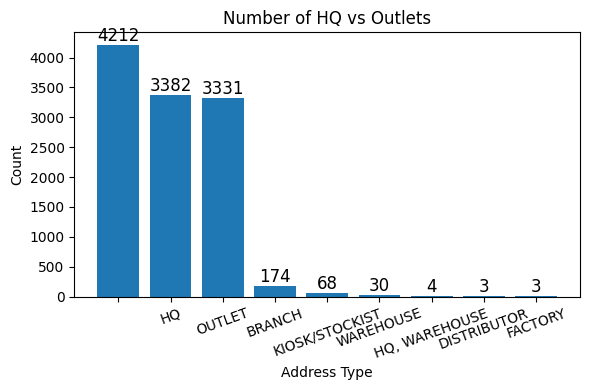

In [33]:
# ---------------- MATPLOTLIB PLOT: HQ vs OUTLETS ----------------
col = "Operational Address Type"

Master_DB_df[col] = Master_DB_df[col].astype(str).str.strip().str.upper()
counts = Master_DB_df[col].value_counts(dropna=False)

plt.figure(figsize=(6,4))
bars = plt.bar(counts.index, counts.values)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height),
             ha='center', va='bottom', fontsize=12)

plt.title("Number of HQ vs Outlets")
plt.xlabel("Address Type")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()